In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4E28-3FB0

 Directory of C:\Users\HP\Desktop\Assignments\assignment no.15(Random Forest)

01/05/2023  03:57 PM    <DIR>          .
01/05/2023  03:57 PM    <DIR>          ..
12/16/2022  06:02 PM    <DIR>          .ipynb_checkpoints
12/16/2022  03:11 PM            17,023 Company_Data.csv
01/05/2023  03:57 PM           104,969 CompanyData_RF.ipynb
12/16/2022  03:31 PM            18,826 Fraud_check.csv
12/16/2022  06:18 PM            49,208 Fraud_check_RF.ipynb
12/16/2022  05:49 PM            43,868 Priyanka_Company_Data_RF.ipynb
12/16/2022  03:13 PM             1,378 problem statement(company data).txt
12/16/2022  03:11 PM               133 Problem_statement(Fraudcheck).txt
               7 File(s)        235,405 bytes
               3 Dir(s)  136,026,566,656 bytes free


In [4]:
cd=pd.read_csv('Company_Data.csv')

In [5]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Data Understanding

In [6]:
cd.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
cd.shape

(400, 11)

In [8]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

# Data Processing

In [9]:
cd['ShelveLoc'].unique(),cd['Urban'].unique(),cd['US'].unique()

(array(['Bad', 'Good', 'Medium'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [10]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [11]:
cd['ShelveLoc']=LE.fit_transform(cd['ShelveLoc'])
cd['Urban']=LE.fit_transform(cd['Urban'])
cd['US']=LE.fit_transform(cd['US'])

In [12]:
cd.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [13]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


# converting sales into categorical variable

In [14]:
cd.insert(11,"sales_variable",'')
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,
1,11.22,111,48,16,260,83,1,65,10,1,1,
2,10.06,113,35,10,269,80,2,59,12,1,1,
3,7.40,117,100,4,466,97,2,55,14,1,1,
4,4.15,141,64,3,340,128,0,38,13,1,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,
396,6.14,139,23,3,37,120,2,55,11,0,1,
397,7.41,162,26,12,368,159,2,40,18,1,1,
398,5.94,100,79,7,284,95,0,50,12,1,1,


In [15]:
for i in range(0,len(cd['Sales'])):
    if cd['Sales'][i]>=11.0:
        cd['sales_variable'][i] = 'High'
    elif cd['Sales'][i]<=6.0:
        cd['sales_variable'][i] = 'Low'
    else:
        cd['sales_variable'][i] = 'Medium'

In [16]:
cd

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_variable
0,9.50,138,73,11,276,120,0,42,17,1,1,Medium
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,Medium
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,0,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,High
396,6.14,139,23,3,37,120,2,55,11,0,1,Medium
397,7.41,162,26,12,368,159,2,40,18,1,1,Medium
398,5.94,100,79,7,284,95,0,50,12,1,1,Low


# Model building

In [17]:
X=cd.iloc[:,1:-1]
Y=cd.iloc[:,-1]

In [18]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [19]:
Y.head()

0    Medium
1      High
2    Medium
3    Medium
4       Low
Name: sales_variable, dtype: object

# split into training and testing data

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=7)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((300, 10), (100, 10), (300,), (100,))

In [21]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
382,121,28,19,315,121,2,66,14,1,1
84,111,25,0,52,121,0,43,18,0,0
115,139,35,0,95,129,2,42,13,1,0
328,117,66,1,65,111,0,55,11,1,1
99,121,47,3,220,107,0,56,16,0,1
...,...,...,...,...,...,...,...,...,...,...
211,117,118,14,445,120,2,32,15,1,1
67,126,61,14,152,115,2,47,16,1,1
25,139,32,0,176,82,1,54,11,0,0
196,130,28,6,410,133,0,72,16,1,1


In [22]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
265,130,35,10,402,129,0,39,17,1,1
65,122,26,0,197,128,2,55,13,0,0
120,128,105,11,249,131,2,63,13,1,1
132,125,87,9,232,136,1,72,10,1,1
378,133,88,3,105,119,2,79,12,1,1
...,...,...,...,...,...,...,...,...,...,...
288,116,40,0,74,97,2,76,15,0,0
66,127,92,0,508,91,2,56,18,1,0
303,133,52,16,290,99,2,43,11,1,1
165,147,58,7,100,191,0,27,15,1,1


In [23]:
y_train

382       Low
84        Low
115    Medium
328       Low
99        Low
        ...  
211    Medium
67     Medium
25       High
196       Low
175    Medium
Name: sales_variable, Length: 300, dtype: object

In [24]:
y_test

265       Low
65        Low
120    Medium
132    Medium
378    Medium
        ...  
288    Medium
66     Medium
303    Medium
165       Low
101    Medium
Name: sales_variable, Length: 100, dtype: object

# # Doing Grid Search CV To find Best Hyperparameter

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
model=RandomForestClassifier()
parameters={
    
    "n_estimators":[130, 140, 150, 160],
    "max_features":[4,5,6,7]
}

In [27]:
grid_DT=GridSearchCV(model,parameters,cv=10)

In [28]:
grid_DT.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'n_estimators': [130, 140, 150, 160]})

In [29]:
grid_DT.best_score_

0.6866666666666668

In [30]:
grid_DT.best_params_

{'max_features': 6, 'n_estimators': 150}

In [31]:
final_model=RandomForestClassifier(max_features=7, n_estimators=130)

In [32]:
final_model.fit(x_train,y_train)

RandomForestClassifier(max_features=7, n_estimators=130)

In [33]:
print(classification_report(y_test,final_model.predict(x_test)))

              precision    recall  f1-score   support

        High       1.00      0.40      0.57        10
         Low       0.78      0.60      0.68        30
      Medium       0.75      0.92      0.83        60

    accuracy                           0.77       100
   macro avg       0.85      0.64      0.69       100
weighted avg       0.79      0.77      0.76       100



# feature selection technique

In [35]:
from sklearn.feature_selection import RFE
from sklearn.tree import  DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [36]:
rfe.get_support()

array([False,  True,  True, False,  True,  True,  True, False, False,
       False])

In [37]:
rfe_features = x_train.columns[rfe.get_support()]
rfe_features

Index(['Income', 'Advertising', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [38]:
x_train_transform_rfe = rfe.transform(x_train)
x_test_transform_rfe = rfe.transform(x_test)

In [39]:
rfe_model = DecisionTreeClassifier()
rfe_model.fit(x_train_transform_rfe,y_train)

DecisionTreeClassifier()

In [40]:
y_pred_rfe = rfe_model.predict(x_test_transform_rfe)

In [41]:
imp_feature_rfe=rfe_model.feature_importances_

In [42]:
rfe_data=pd.DataFrame({'feature':rfe_features,'imp_feature':imp_feature_rfe})
rfe_data=rfe_data.sort_values('imp_feature')

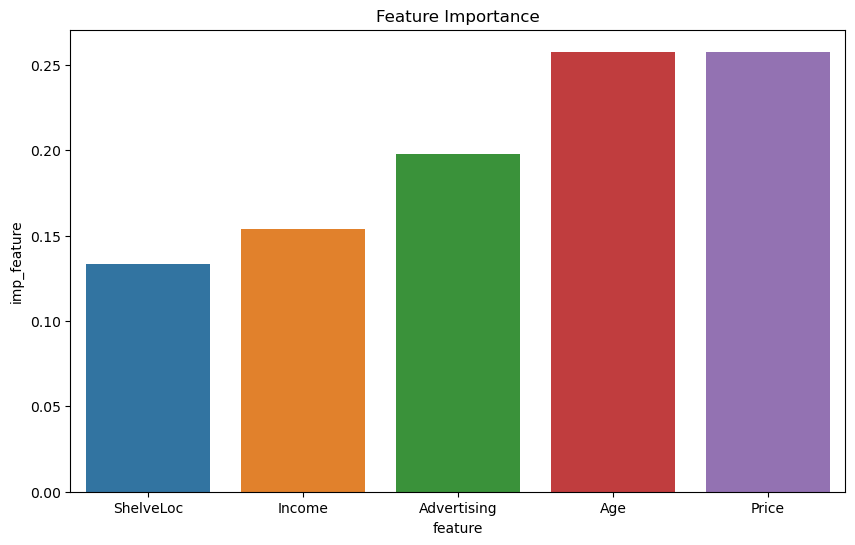

In [43]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='imp_feature', x='feature', data=rfe_data)
plt.show()